## Import and view mnist data

In [2]:
# import packages
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load image data from mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


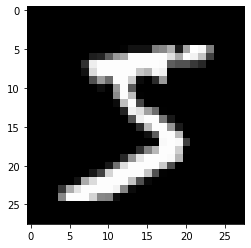

In [33]:
# show an example of what the data looks like, converting the numpy array into an image
plt.imshow(x_train[0], cmap='gray')

## Pre-process data

In [4]:
# check the shape of each dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [13]:
# reformat the features of the dataset and divide by 255 to keep all values between 0 and 1
x_train_reformat = x_train.reshape(60000, 28*28).astype('float32') / 255
x_test_reformat = x_test.reshape(10000, 28*28).astype('float32') / 255

In [9]:
# check what the labels look like
y_train[0]

5

In [12]:
# convert the digit labels to categories where only one digit is 1 indicating what the label is
y_train_category = to_categorical(y_train, num_classes=10)
y_test_category = to_categorical(y_test, num_classes=10)

In [11]:
y_train_category[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build a model - Neural Network

In [18]:
# Build a model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
# actually create the model into memory
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# fit the model to the training data and check accuracy with test data
history = model.fit(x_train_reformat, y_train_category, epochs=20, validation_data=(x_test_reformat, y_test_category))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1858 - accuracy: 0.9433 - val_loss: 0.0960 - val_accuracy: 0.9726
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0814 - accuracy: 0.9750 - val_loss: 0.0756 - val_accuracy: 0.9755
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.0928 - val_accuracy: 0.9732
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0681 - val_accuracy: 0.9788
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.1065 - val_accuracy: 0.9735
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0860 - val_accuracy: 0.9807
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0820 - val_accuracy:

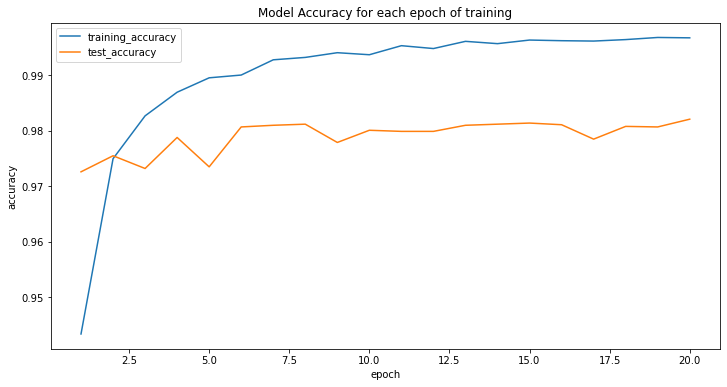

In [31]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,21,1), history.history['accuracy'], label='training_accuracy')
plt.plot(np.arange(1,21,1), history.history['val_accuracy'], label='test_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Model Accuracy for each epoch of training')
plt.legend()

## Build a Model - Convolutional Neural Network 

Before building the convolutional neural network model, we are required to do some preprocessing of the initial training and testing data. The mnist images only have a depth of 1, only one colour channel because the images are grayscale, not rgb but we must explicitly state this.

In [36]:
# Check the shape of the training and test features data
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [37]:
# reformat data
x_train_cnn = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test_cnn = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255

In [46]:
y_train_category_cnn = to_categorical(y_train, 10)
y_test_category_cnn = to_categorical(y_test, 10)

In [47]:
# import the different layers for convolutional neural network model
from keras.layers import Conv2D, Flatten, MaxPooling2D

In [50]:
# create the structure for the convolutional neural network model
model_cnn = Sequential()

model_cnn.add(Conv2D(32, activation='relu', kernel_size=(5,5), padding='same', input_shape=(28,28,1)))
model_cnn.add(MaxPooling2D())

model_cnn.add(Conv2D(64, activation='relu', kernel_size=(5,5), padding='same'))
model_cnn.add(MaxPooling2D())

model_cnn.add(Flatten())

model_cnn.add(Dense(1024, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [51]:
# compile the model, create the model into memory
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
# fit the model to the training data and validate on testing data
history = model_cnn.fit(x_train_cnn, y_train_category_cnn, epochs=5, validation_data=(x_test_cnn, y_test_category_cnn))

Epoch 1/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0349 - accuracy: 0.9898 - val_loss: 0.0367 - val_accuracy: 0.9886
Epoch 2/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.0285 - val_accuracy: 0.9908
Epoch 3/5
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0262 - val_accuracy: 0.9924
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0238 - val_accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0346 - val_accuracy: 0.9906


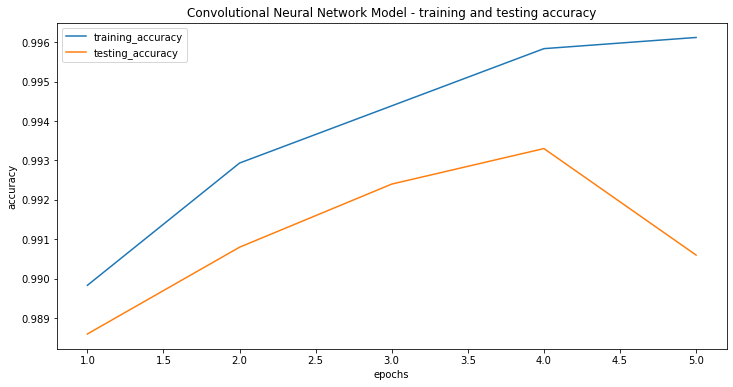

In [55]:
# plot the training and testing accuracy of the model
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,6,1), history.history['accuracy'], label='training_accuracy')
plt.plot(np.arange(1,6,1), history.history['val_accuracy'], label='testing_accuracy')
plt.title('Convolutional Neural Network Model - training and testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

We can conclude that the convolutional neural network outperforms the regular neural network model. The convolutional layer accounts for translation invariance which means that it can spot a pattern anywhere across an image as the 5x5 kernel goes acroos the whole image. The 32 output nodes for the first convolutional layer indicates there are 32 different filters for the convolutional layer meaning it can detect 32 different patterns.